## Yahoo Finace Libaray

In [28]:

# Define the stock symbol and date range
stock_symbol = "AAME"
start_date = "2013-01-01"
end_date = "2023-01-01"

# Fetch historical stock data from Yahoo Finance
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Reset index to make 'Date' a column again
stock_data.reset_index(inplace=True)

## Plot historical data

In [24]:
import time
from datetime import datetime
import plotly_express as px


def plot_stock_data(data,title):
    '''function for plotting stock data'''
    plot = px.line(data, 
                        x="Date", 
                        y=["Close"], 
                        hover_name="Date",
                        line_shape="linear",
                        title=title) 
    return plot

plot_stock_data(stock_data[-30:],'Airline') # for 30 days

In [25]:
stock_data[['Close']].plot()
plt.title("Closed Price Stock Market")
plt.show()

## Outlier checking

In [ ]:
# Convert the "Date" column to a datetime format
df['Date'] = pd.to_datetime(df['Date'])
df

In [ ]:
# Specify the column to analyze for outliers 
column_name = 'Open'

# Calculate the IQR (Interquartile Range)
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and count outliers
outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
num_outliers = len(outliers)

# Display the number of outliers
print(f'Number of outliers in {column_name}: {num_outliers}')


In [ ]:
# Specify the column to analyze for outliers 
column_name = 'Close'

# Calculate the IQR (Interquartile Range)
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and count outliers
outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
num_outliers = len(outliers)

# Display the number of outliers
print(f'Number of outliers in {column_name}: {num_outliers}')


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Specify the column to visualize outliers 
column_name = 'Close'

# Create a box plot to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df[column_name], orient='v', width=0.3, palette='Set1')
plt.title(f'Box Plot for {column_name} (with Outliers)')
plt.ylabel(column_name)
plt.show()


## Hyperparameters

In [3]:
# Define hyperparameters
input_size = len(feature_columns)
hidden_size = 64
output_size = 1
num_layers = 2
num_attention_heads = 4
learning_rate = 0.001
num_epochs = 100
# Define the number of time steps to use as input features
num_time_steps = 10 

## LSTM

[*********************100%***********************]  1 of 1 completed


Epoch [1/100], Training Loss (LSTM): 0.9128
Epoch [1/100], Validation Loss (LSTM): 1.1017
Epoch [1/100], Test Loss (LSTM): 1.3906
Epoch [2/100], Training Loss (LSTM): 0.9065
Epoch [2/100], Validation Loss (LSTM): 1.1072
Epoch [2/100], Test Loss (LSTM): 1.3962
Epoch [3/100], Training Loss (LSTM): 0.9002
Epoch [3/100], Validation Loss (LSTM): 1.1127
Epoch [3/100], Test Loss (LSTM): 1.4019
Epoch [4/100], Training Loss (LSTM): 0.8940
Epoch [4/100], Validation Loss (LSTM): 1.1182
Epoch [4/100], Test Loss (LSTM): 1.4075
Epoch [5/100], Training Loss (LSTM): 0.8877
Epoch [5/100], Validation Loss (LSTM): 1.1238
Epoch [5/100], Test Loss (LSTM): 1.4131
Epoch [6/100], Training Loss (LSTM): 0.8813
Epoch [6/100], Validation Loss (LSTM): 1.1292
Epoch [6/100], Test Loss (LSTM): 1.4187
Epoch [7/100], Training Loss (LSTM): 0.8748
Epoch [7/100], Validation Loss (LSTM): 1.1347
Epoch [7/100], Test Loss (LSTM): 1.4241
Epoch [8/100], Training Loss (LSTM): 0.8683
Epoch [8/100], Validation Loss (LSTM): 1.1400


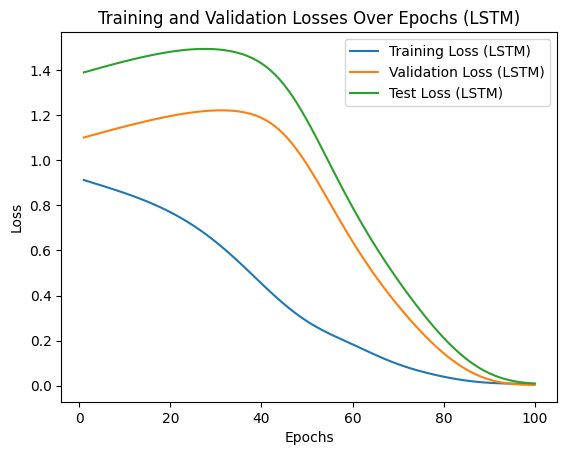

Validation Set Metrics (LSTM):
Mean Absolute Error (MAE): 0.0480
Mean Squared Error (MSE): 0.0032
Root Mean Squared Error (RMSE): 0.0564
Mean Absolute Percentage Error (MAPE): 5.4023

Test Set Metrics (LSTM):
Mean Absolute Error (MAE): 0.0759
Mean Squared Error (MSE): 0.0089
Root Mean Squared Error (RMSE): 0.0943
Mean Absolute Percentage Error (MAPE): 6.7547


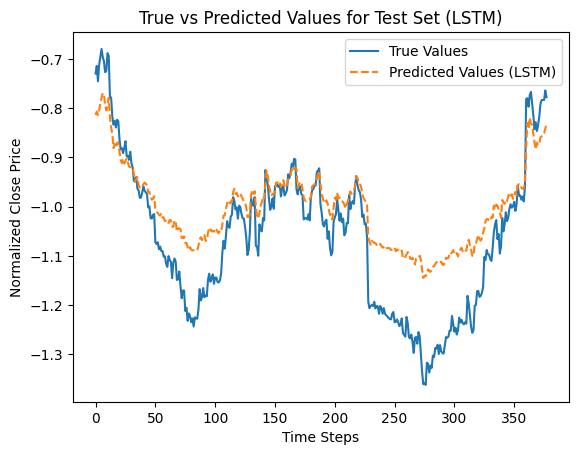

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import yfinance as yf
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate Mean Absolute Percentage Error (MAPE)
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Define the stock symbol and date range
stock_symbol = "AAL"
start_date = "2015-01-01"
end_date = "2025-01-01"

# Fetch historical stock data from Yahoo Finance
stock_data = yf.download(stock_symbol, start=start_date, end=end_date, auto_adjust=False)

# Reset index to make 'Date' a column again
stock_data.reset_index(inplace=True)

# Rename 'Adj Close' to 'Adjusted Close'
stock_data.rename(columns={'Adj Close': 'Adjusted Close'}, inplace=True)

# Use 'Date' as index
stock_data.set_index('Date', inplace=True)

# Normalize data
columns_to_normalize = ['Low', 'Open', 'Volume', 'High', 'Close', 'Adjusted Close']
data_to_normalize = stock_data[columns_to_normalize].values

# Convert the data to PyTorch tensor
tensor_data = torch.tensor(data_to_normalize, dtype=torch.float32)

# Calculate mean and standard deviation for each column
mean = tensor_data.mean(dim=0)
std = tensor_data.std(dim=0)

# Normalize the data
normalized_data = (tensor_data - mean) / std

# Convert the normalized data back to a DataFrame
df_normalized = pd.DataFrame(normalized_data.numpy(), columns=columns_to_normalize)

# Add 'Date' column back to the DataFrame
df_normalized['Date'] = stock_data.index
data = df_normalized

# Define the percentage of data for training, validation, and testing
train_percent = 0.7
val_percent = 0.15
test_percent = 0.15

# Calculate the sizes of the train, validation, and test sets
train_size = int(train_percent * len(data))
val_size = int(val_percent * len(data))
test_size = len(data) - train_size - val_size

# Split the data into train, validation, and test sets
train_data = data.iloc[:train_size]
val_data = data.iloc[train_size:train_size + val_size]
test_data = data.iloc[train_size + val_size:]

# Define the features(inputs) and target columns
feature_columns = ['Low', 'Open', 'High']
target_column = 'Close'

# Extract features and target for each dataset
train_features = train_data[feature_columns].values
train_target = train_data[target_column].values

val_features = val_data[feature_columns].values
val_target = val_data[target_column].values

test_features = test_data[feature_columns].values
test_target = test_data[target_column].values

# Convert data to PyTorch tensors
train_features = torch.tensor(train_features, dtype=torch.float32)
train_target = torch.tensor(train_target, dtype=torch.float32)
val_features = torch.tensor(val_features, dtype=torch.float32)
val_target = torch.tensor(val_target, dtype=torch.float32)
test_features = torch.tensor(test_features, dtype=torch.float32)
test_target = torch.tensor(test_target, dtype=torch.float32)

num_epochs= 100



class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc_output = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        _, (hn, cn) = self.lstm(x)  # Use both hidden state (hn) and cell state (cn)
        x = self.fc_output(hn[-1, :, :])
        return x



# Define hyperparameters for LSTM
hidden_size_lstm = 64
num_layers_lstm = 2

# Create the LSTM model instance
model_lstm = LSTMModel(input_size, hidden_size_lstm, output_size, num_layers_lstm)

# Define the loss function and optimizer for LSTM
criterion= nn.MSELoss()
optimizer_lstm = optim.Adam(model_lstm.parameters(), lr=learning_rate)

# Lists to store training, validation, and test losses for LSTM
train_losses_lstm = []
val_losses_lstm = []
test_losses_lstm = []  # This list will store test loss for each epoch



# Training loop for LSTM
for epoch in range(num_epochs):
    model_lstm.train()
    optimizer_lstm.zero_grad()

    # Forward pass for LSTM
    outputs_lstm = model_lstm(train_features.unsqueeze(1))
    
    # Calculate the loss for LSTM
    loss_lstm = criterion(outputs_lstm, train_target.unsqueeze(1))

    # Backpropagation and optimization for LSTM
    loss_lstm.backward()
    optimizer_lstm.step()

    # Store the training loss for LSTM
    train_losses_lstm.append(loss_lstm.item())

    print(f'Epoch [{epoch + 1}/{num_epochs}], Training Loss (LSTM): {loss_lstm.item():.4f}')

    # Validation loss for LSTM
    model_lstm.eval()
    with torch.no_grad():
        val_outputs_lstm = model_lstm(val_features.unsqueeze(1))
        val_loss_lstm = criterion(val_outputs_lstm, val_target.unsqueeze(1))
    
    # Store the validation loss for LSTM
    val_losses_lstm.append(val_loss_lstm.item())

    print(f'Epoch [{epoch + 1}/{num_epochs}], Validation Loss (LSTM): {val_loss_lstm.item():.4f}')

    # Test loss for LSTM
    with torch.no_grad():
        test_outputs_lstm = model_lstm(test_features.unsqueeze(1))
        test_loss_lstm = criterion(test_outputs_lstm, test_target.unsqueeze(1))

    # Store the test loss for each epoch for LSTM
    test_losses_lstm.append(test_loss_lstm.item())

    print(f'Epoch [{epoch + 1}/{num_epochs}], Test Loss (LSTM): {test_loss_lstm.item():.4f}')


# Plotting the training and validation losses for LSTM
plt.plot(range(1, num_epochs + 1), train_losses_lstm, label='Training Loss (LSTM)')
plt.plot(range(1, num_epochs + 1), val_losses_lstm, label='Validation Loss (LSTM)')
plt.plot(range(1, num_epochs + 1), test_losses_lstm, label='Test Loss (LSTM)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Losses Over Epochs (LSTM)')
plt.legend()
plt.show()


# Switch the LSTM model to evaluation mode
model_lstm.eval()

# Make predictions on the validation set using LSTM
with torch.no_grad():
    val_predictions_lstm = model_lstm(val_features.unsqueeze(1))

# Convert predictions and targets back to numpy arrays for LSTM
val_predictions_lstm = val_predictions_lstm.squeeze(1).numpy()

# Calculate evaluation metrics for validation set using LSTM
mae_val_lstm = mean_absolute_error(val_target.numpy(), val_predictions_lstm)
mse_val_lstm = mean_squared_error(val_target.numpy(), val_predictions_lstm)
rmse_val_lstm = np.sqrt(mse_val_lstm)
mape_val_lstm = calculate_mape(val_target.numpy(), val_predictions_lstm)

# Print the evaluation metrics for validation set using LSTM
print('Validation Set Metrics (LSTM):')
print(f'Mean Absolute Error (MAE): {mae_val_lstm:.4f}')
print(f'Mean Squared Error (MSE): {mse_val_lstm:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_val_lstm:.4f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_val_lstm:.4f}')
print()

# Make predictions on the test set using LSTM
with torch.no_grad():
    test_predictions_lstm = model_lstm(test_features.unsqueeze(1))

# Convert predictions and targets back to numpy arrays for LSTM
test_predictions_lstm = test_predictions_lstm.squeeze(1).numpy()

# Calculate evaluation metrics for test set using LSTM
mae_test_lstm = mean_absolute_error(test_target.numpy(), test_predictions_lstm)
mse_test_lstm = mean_squared_error(test_target.numpy(), test_predictions_lstm)
rmse_test_lstm = np.sqrt(mse_test_lstm)
mape_test_lstm = calculate_mape(test_target.numpy(), test_predictions_lstm)

# Print the evaluation metrics for test set using LSTM
print('Test Set Metrics (LSTM):')
print(f'Mean Absolute Error (MAE): {mae_test_lstm:.4f}')
print(f'Mean Squared Error (MSE): {mse_test_lstm:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_test_lstm:.4f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_test_lstm:.4f}')

# Plotting the predicted values against true values for the test set using LSTM
plt.plot(test_target.numpy(), label='True Values')
plt.plot(test_predictions_lstm, label='Predicted Values (LSTM)', linestyle='dashed')
plt.xlabel('Time Steps')
plt.ylabel('Normalized Close Price')
plt.title('True vs Predicted Values for Test Set (LSTM)')
plt.legend()
plt.show()




In [11]:
# Calculate R2
r2 = r2_score(test_target, test_predictions_lstm)
print(f'R-squared: {r2}')

R-squared: 0.9842929076853941


# LSTM+GCN

[*********************100%***********************]  1 of 1 completed


Epoch [1/100], Training Loss: 1.0811
Epoch [1/100], Validation Loss: 0.7311
Epoch [1/100], Test Loss: 0.9696
Epoch [2/100], Training Loss: 1.0708
Epoch [2/100], Validation Loss: 0.7397
Epoch [2/100], Test Loss: 0.9794
Epoch [3/100], Training Loss: 1.0604
Epoch [3/100], Validation Loss: 0.7484
Epoch [3/100], Test Loss: 0.9894
Epoch [4/100], Training Loss: 1.0500
Epoch [4/100], Validation Loss: 0.7573
Epoch [4/100], Test Loss: 0.9995
Epoch [5/100], Training Loss: 1.0394
Epoch [5/100], Validation Loss: 0.7663
Epoch [5/100], Test Loss: 1.0097
Epoch [6/100], Training Loss: 1.0286
Epoch [6/100], Validation Loss: 0.7753
Epoch [6/100], Test Loss: 1.0200
Epoch [7/100], Training Loss: 1.0176
Epoch [7/100], Validation Loss: 0.7845
Epoch [7/100], Test Loss: 1.0304
Epoch [8/100], Training Loss: 1.0062
Epoch [8/100], Validation Loss: 0.7938
Epoch [8/100], Test Loss: 1.0408
Epoch [9/100], Training Loss: 0.9945
Epoch [9/100], Validation Loss: 0.8031
Epoch [9/100], Test Loss: 1.0513
Epoch [10/100], Tra

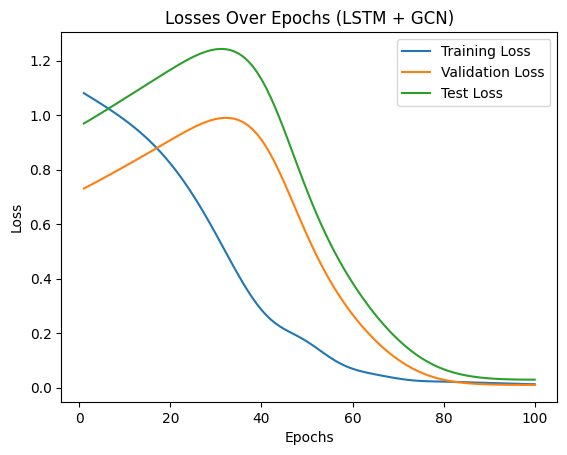

Validation Set Metrics (LSTM + GCN):
Mean Absolute Error (MAE): 0.0855
Mean Squared Error (MSE): 0.0102
Root Mean Squared Error (RMSE): 0.1010
Mean Absolute Percentage Error (MAPE): 8.8103

Test Set Metrics (LSTM + GCN):
Mean Absolute Error (MAE): 0.1490
Mean Squared Error (MSE): 0.0296
Root Mean Squared Error (RMSE): 0.1719
Mean Absolute Percentage Error (MAPE): 13.1959


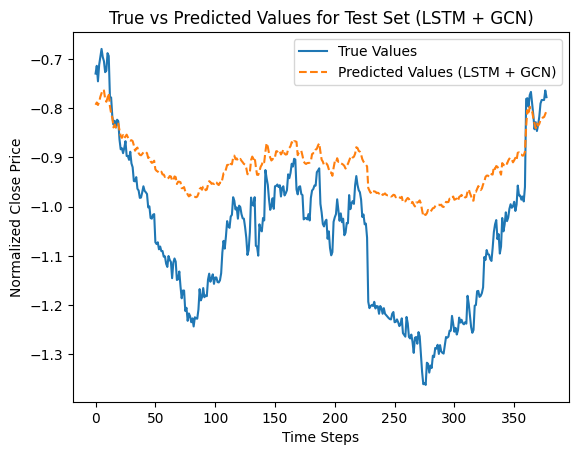

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import yfinance as yf
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# 計算 Mean Absolute Percentage Error (MAPE)
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

###############################################
# 資料讀取與前處理
###############################################
stock_symbol = "AAL"
start_date = "2015-01-01"
end_date = "2025-01-01"

# 下載 Yahoo Finance 資料
stock_data = yf.download(stock_symbol, start=start_date, end=end_date, auto_adjust=False)
stock_data.reset_index(inplace=True)
stock_data.rename(columns={'Adj Close': 'Adjusted Close'}, inplace=True)
stock_data.set_index('Date', inplace=True)

# 選取正規化欄位
columns_to_normalize = ['Low', 'Open', 'Volume', 'High', 'Close', 'Adjusted Close']
data_to_normalize = stock_data[columns_to_normalize].values

# 轉為 tensor 並正規化
tensor_data = torch.tensor(data_to_normalize, dtype=torch.float32)
mean_tensor = tensor_data.mean(dim=0)
std_tensor = tensor_data.std(dim=0)
normalized_data = (tensor_data - mean_tensor) / std_tensor

# 轉回 DataFrame，並加回日期資訊
df_normalized = pd.DataFrame(normalized_data.numpy(), columns=columns_to_normalize)
df_normalized['Date'] = stock_data.index
data = df_normalized

# 切分資料集：訓練70%，驗證15%，測試15%
train_percent = 0.7
val_percent = 0.15
test_percent = 0.15

train_size = int(train_percent * len(data))
val_size = int(val_percent * len(data))
test_size = len(data) - train_size - val_size

train_data = data.iloc[:train_size]
val_data   = data.iloc[train_size:train_size + val_size]
test_data  = data.iloc[train_size + val_size:]

# 定義特徵與目標：特徵取 'Low', 'Open', 'High'（共3個），目標為 'Close'
feature_columns = ['Low', 'Open', 'High']
target_column   = 'Close'

train_features = train_data[feature_columns].values   # shape: (N_train, 3)
train_target   = train_data[target_column].values         # shape: (N_train, )

val_features   = val_data[feature_columns].values
val_target     = val_data[target_column].values

test_features  = test_data[feature_columns].values
test_target    = test_data[target_column].values

# 轉換為 PyTorch tensor
train_features = torch.tensor(train_features, dtype=torch.float32)
train_target   = torch.tensor(train_target, dtype=torch.float32)
val_features   = torch.tensor(val_features, dtype=torch.float32)
val_target     = torch.tensor(val_target, dtype=torch.float32)
test_features  = torch.tensor(test_features, dtype=torch.float32)
test_target    = torch.tensor(test_target, dtype=torch.float32)

###############################################
# 定義簡單 GCN 層
###############################################
class GCNLayer(nn.Module):
    def __init__(self, in_features, out_features):
        """
        in_features  : 每個節點的輸入維度
        out_features : 輸出維度
        """
        super(GCNLayer, self).__init__()
        self.linear = nn.Linear(in_features, out_features)
    
    def forward(self, x, A):
        """
        x: shape (batch, num_nodes, in_features)
        A: 鄰接矩陣，形狀 (num_nodes, num_nodes)
           假設所有資料皆採用相同 A（可視為常數）
        """
        # 使用批次矩陣乘法，A 為 (num_nodes, num_nodes)，x 為 (batch, num_nodes, in_features)
        x = torch.matmul(A, x)
        x = self.linear(x)
        return torch.relu(x)

###############################################
# 定義結合 GCN 與 LSTM 的模型
###############################################
class LSTM_GCN_Model(nn.Module):
    def __init__(self, input_size, gcn_out_features, lstm_hidden_size, output_size, num_layers, A_norm):
        """
        input_size       : 原始特徵數，此例中為 3 (代表 3 個節點)
        gcn_out_features : GCN 層的輸出維度
        lstm_hidden_size : LSTM 隱藏層維度
        output_size      : 輸出維度 (預測單一數值)
        num_layers       : LSTM 層數
        A_norm           : 預先計算好的鄰接矩陣 (已做正規化)，形狀 (input_size, input_size)
        """
        super(LSTM_GCN_Model, self).__init__()
        # 定義 GCN 層：因為原始每個節點僅有一個標量特徵，所以 in_features=1
        self.gcn = GCNLayer(in_features=1, out_features=gcn_out_features)
        # 定義 LSTM：輸入維度為 GCN 層輸出
        self.lstm = nn.LSTM(gcn_out_features, lstm_hidden_size, num_layers, batch_first=True)
        # 全連接層將 LSTM 隱藏層映射到最終輸出
        self.fc = nn.Linear(lstm_hidden_size, output_size)
        # 儲存鄰接矩陣與節點數
        self.A_norm = A_norm
        self.num_nodes = input_size

    def forward(self, x):
        """
        x: 原始輸入 shape (batch, 1, input_size)
           這裡 batch 中每筆資料只有一個時間點，但內含 3 個特徵（視為 3 個節點）
        """
        # 先去除時間維度，變成 (batch, input_size)
        x = x.squeeze(1)
        # 將每個標量特徵視為一個節點，擴展最後一維：(batch, num_nodes, 1)
        x = x.unsqueeze(-1)
        # 利用 GCN 層處理：輸出 shape (batch, num_nodes, gcn_out_features)
        x = self.gcn(x, self.A_norm)
        # 進行節點聚合：這裡以平均聚合方式得到圖層全局表示 (batch, gcn_out_features)
        x = x.mean(dim=1)
        # 為符合 LSTM 輸入，需加入時間軸，此處視為單一時間點：(batch, 1, gcn_out_features)
        x = x.unsqueeze(1)
        # LSTM 層
        lstm_out, (hn, cn) = self.lstm(x)
        # 取最後一層隱藏狀態做預測
        out = self.fc(hn[-1])
        return out

###############################################
# 定義模型訓練參數與預先計算鄰接矩陣
###############################################
num_epochs = 100
input_size = len(feature_columns)  # 3
output_size = 1
learning_rate = 0.001

gcn_out_features = 16      # GCN 層輸出維度，可依需求調整
lstm_hidden_size = 64      # LSTM 隱藏層維度
num_layers = 2             # LSTM 層數

# 為圖中 3 個節點定義一個完全連通的鄰接矩陣，並做正規化
num_nodes = input_size
A = torch.ones(num_nodes, num_nodes)  # 完全連通（含自迴圈）
degree = A.sum(dim=1)
D_inv_sqrt = torch.diag(torch.pow(degree, -0.5))
A_norm = D_inv_sqrt @ A @ D_inv_sqrt  # (3, 3)

###############################################
# 建立模型、定義損失與優化器
###############################################
model = LSTM_GCN_Model(input_size, gcn_out_features, lstm_hidden_size, output_size, num_layers, A_norm)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# 用於記錄各階段損失
train_losses = []
val_losses   = []
test_losses  = []

###############################################
# 模型訓練迴圈
###############################################
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    # 原始資料 shape 為 (batch, input_size) -> 加上時間軸變成 (batch, 1, input_size)
    outputs = model(train_features.unsqueeze(1))
    loss = criterion(outputs, train_target.unsqueeze(1))
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())
    print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {loss.item():.4f}')
    
    # 驗證
    model.eval()
    with torch.no_grad():
        val_outputs = model(val_features.unsqueeze(1))
        val_loss = criterion(val_outputs, val_target.unsqueeze(1))
    val_losses.append(val_loss.item())
    print(f'Epoch [{epoch+1}/{num_epochs}], Validation Loss: {val_loss.item():.4f}')
    
    # 測試
    with torch.no_grad():
        test_outputs = model(test_features.unsqueeze(1))
        test_loss = criterion(test_outputs, test_target.unsqueeze(1))
    test_losses.append(test_loss.item())
    print(f'Epoch [{epoch+1}/{num_epochs}], Test Loss: {test_loss.item():.4f}')

# 繪製訓練、驗證與測試損失曲線
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
plt.plot(range(1, num_epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Losses Over Epochs (LSTM + GCN)')
plt.legend()
plt.show()

###############################################
# 模型評估：驗證集與測試集
###############################################
model.eval()
with torch.no_grad():
    val_predictions = model(val_features.unsqueeze(1))
val_predictions = val_predictions.squeeze(1).numpy()

mae_val = mean_absolute_error(val_target.numpy(), val_predictions)
mse_val = mean_squared_error(val_target.numpy(), val_predictions)
rmse_val = np.sqrt(mse_val)
mape_val = calculate_mape(val_target.numpy(), val_predictions)

print('Validation Set Metrics (LSTM + GCN):')
print(f'Mean Absolute Error (MAE): {mae_val:.4f}')
print(f'Mean Squared Error (MSE): {mse_val:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_val:.4f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_val:.4f}\n')

with torch.no_grad():
    test_predictions = model(test_features.unsqueeze(1))
test_predictions = test_predictions.squeeze(1).numpy()

mae_test = mean_absolute_error(test_target.numpy(), test_predictions)
mse_test = mean_squared_error(test_target.numpy(), test_predictions)
rmse_test = np.sqrt(mse_test)
mape_test = calculate_mape(test_target.numpy(), test_predictions)

print('Test Set Metrics (LSTM + GCN):')
print(f'Mean Absolute Error (MAE): {mae_test:.4f}')
print(f'Mean Squared Error (MSE): {mse_test:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_test:.4f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_test:.4f}')

# 繪製測試集預測與真實值對比圖
plt.plot(test_target.numpy(), label='True Values')
plt.plot(test_predictions, label='Predicted Values (LSTM + GCN)', linestyle='dashed')
plt.xlabel('Time Steps')
plt.ylabel('Normalized Close Price')
plt.title('True vs Predicted Values for Test Set (LSTM + GCN)')
plt.legend()
plt.show()


## Transformer

[*********************100%***********************]  1 of 1 completed
/home/kenny1208/anaconda3/envs/Torch/lib/python3.10/site-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch [1/100], Training Loss: 0.7463
Epoch [1/100], Validation Loss: 1.6556
Epoch [1/100], Test Loss: 1.8170
Epoch [2/100], Training Loss: 2.8122
Epoch [2/100], Validation Loss: 0.0492
Epoch [2/100], Test Loss: 0.0477
Epoch [3/100], Training Loss: 0.8334
Epoch [3/100], Validation Loss: 0.0595
Epoch [3/100], Test Loss: 0.0326
Epoch [4/100], Training Loss: 0.1545
Epoch [4/100], Validation Loss: 0.1077
Epoch [4/100], Test Loss: 0.0568
Epoch [5/100], Training Loss: 0.5769
Epoch [5/100], Validation Loss: 0.0136
Epoch [5/100], Test Loss: 0.0377
Epoch [6/100], Training Loss: 0.4358
Epoch [6/100], Validation Loss: 0.1551
Epoch [6/100], Test Loss: 0.2501
Epoch [7/100], Training Loss: 0.2593
Epoch [7/100], Validation Loss: 0.2292
Epoch [7/100], Test Loss: 0.3272
Epoch [8/100], Training Loss: 0.2018
Epoch [8/100], Validation Loss: 0.0765
Epoch [8/100], Test Loss: 0.1286
Epoch [9/100], Training Loss: 0.1635
Epoch [9/100], Validation Loss: 0.0172
Epoch [9/100], Test Loss: 0.0099
Epoch [10/100], Tra

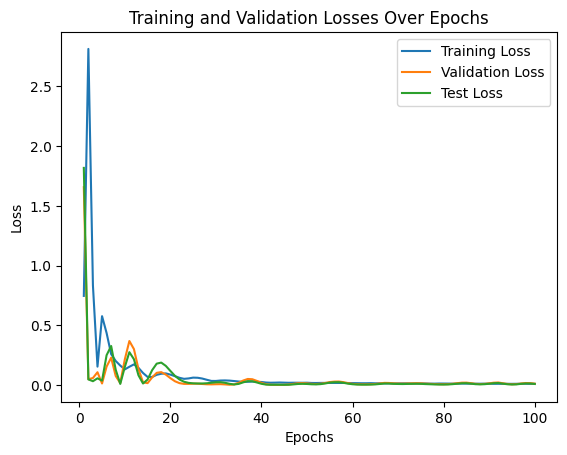

Final Test Loss: 0.0095

Validation Set Metrics:
Mean Absolute Error (MAE): 0.1072
Mean Squared Error (MSE): 0.0121
Root Mean Squared Error (RMSE): 0.1102
Mean Absolute Percentage Error (MAPE): 11.5785

Test Set Metrics:
Mean Absolute Error (MAE): 0.0923
Mean Squared Error (MSE): 0.0095
Root Mean Squared Error (RMSE): 0.0974
Mean Absolute Percentage Error (MAPE): 9.1370


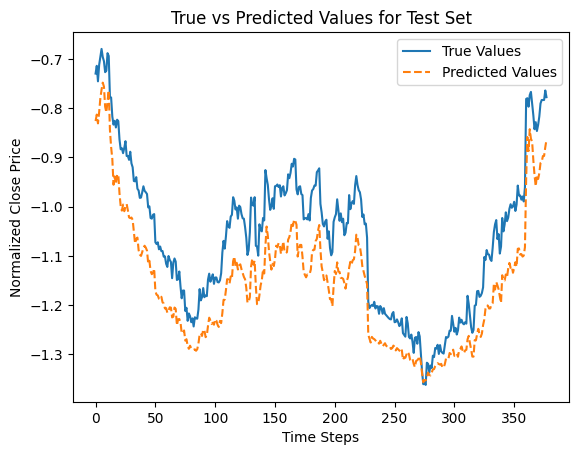

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import yfinance as yf
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate Mean Absolute Percentage Error (MAPE)
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Define the stock symbol and date range
stock_symbol = "AAL"
start_date = "2015-01-01"
end_date = "2025-01-01"

# Fetch historical stock data from Yahoo Finance
stock_data = yf.download(stock_symbol, start=start_date, end=end_date, auto_adjust=False)

# Reset index to make 'Date' a column again
stock_data.reset_index(inplace=True)

# Rename 'Adj Close' to 'Adjusted Close'
stock_data.rename(columns={'Adj Close': 'Adjusted Close'}, inplace=True)

# Use 'Date' as index
stock_data.set_index('Date', inplace=True)

# Normalize data
columns_to_normalize = ['Low', 'Open', 'Volume', 'High', 'Close', 'Adjusted Close']
data_to_normalize = stock_data[columns_to_normalize].values

# Convert the data to PyTorch tensor
tensor_data = torch.tensor(data_to_normalize, dtype=torch.float32)

# Calculate mean and standard deviation for each column
mean = tensor_data.mean(dim=0)
std = tensor_data.std(dim=0)

# Normalize the data
normalized_data = (tensor_data - mean) / std

# Convert the normalized data back to a DataFrame
df_normalized = pd.DataFrame(normalized_data.numpy(), columns=columns_to_normalize)

# Add 'Date' column back to the DataFrame
df_normalized['Date'] = stock_data.index
data = df_normalized

# Define the percentage of data for training, validation, and testing
train_percent = 0.7
val_percent = 0.15
test_percent = 0.15

# Calculate the sizes of the train, validation, and test sets
train_size = int(train_percent * len(data))
val_size = int(val_percent * len(data))
test_size = len(data) - train_size - val_size

# Split the data into train, validation, and test sets
train_data = data.iloc[:train_size]
val_data = data.iloc[train_size:train_size + val_size]
test_data = data.iloc[train_size + val_size:]

# Define the features and target columns
feature_columns = ['Low', 'Open', 'High']
target_column = 'Close'

# Extract features and target for each dataset
train_features = train_data[feature_columns].values
train_target = train_data[target_column].values

val_features = val_data[feature_columns].values
val_target = val_data[target_column].values

test_features = test_data[feature_columns].values
test_target = test_data[target_column].values

# Convert data to PyTorch tensors
train_features = torch.tensor(train_features, dtype=torch.float32)
train_target = torch.tensor(train_target, dtype=torch.float32)
val_features = torch.tensor(val_features, dtype=torch.float32)
val_target = torch.tensor(val_target, dtype=torch.float32)
test_features = torch.tensor(test_features, dtype=torch.float32)
test_target = torch.tensor(test_target, dtype=torch.float32)

# Define a simple Transformer model
class TransformerModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers, num_attention_heads):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_size, hidden_size)
        self.transformer = nn.Transformer(
            d_model=hidden_size,
            nhead=num_attention_heads,
            num_encoder_layers=num_layers,
            num_decoder_layers=num_layers
        )
        self.fc_output = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.embedding(x)
        x = x.permute(1, 0, 2)  # Adjust input shape for the transformer
        x = self.transformer(x, x)  # Set source and target as the same data
        x = x.permute(1, 0, 2)  # Restore the original shape
        x = self.fc_output(x[:, -1, :])  # Use the last layer's output for prediction
        return x

# Define hyperparameters
input_size = len(feature_columns)
hidden_size = 64
output_size = 1
num_layers = 2
num_attention_heads = 4
learning_rate = 0.001
num_epochs = 100

# Create the model instance
model = TransformerModel(input_size, hidden_size, output_size, num_layers, num_attention_heads)

# Define the loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error loss
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Lists to store training, validation, and test losses
train_losses = []
val_losses = []
test_losses = [] 

# Training loop
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    # Forward pass
    outputs = model(train_features.unsqueeze(1))
    
    # Calculate the loss
    loss = criterion(outputs, train_target.unsqueeze(1))

    # Backpropagation and optimization
    loss.backward()
    optimizer.step()

    # Store the training loss
    train_losses.append(loss.item())

    print(f'Epoch [{epoch + 1}/{num_epochs}], Training Loss: {loss.item():.4f}')

    # Validation loss
    model.eval()
    with torch.no_grad():
        val_outputs = model(val_features.unsqueeze(1))
        val_loss = criterion(val_outputs, val_target.unsqueeze(1))
    
    # Store the validation loss
    val_losses.append(val_loss.item())

    print(f'Epoch [{epoch + 1}/{num_epochs}], Validation Loss: {val_loss.item():.4f}')

    # Test loss
    with torch.no_grad():
        test_outputs = model(test_features.unsqueeze(1))
        test_loss = criterion(test_outputs, test_target.unsqueeze(1))

    # Store the test loss for each epoch
    test_losses.append(test_loss.item())

    print(f'Epoch [{epoch + 1}/{num_epochs}], Test Loss: {test_loss.item():.4f}')

# Plotting the training and validation losses
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Losses Over Epochs')
plt.legend()
plt.show()


# Print the test loss for the last epoch
print(f'Final Test Loss: {test_losses[-1]:.4f}')
print()

# Switch the model to evaluation mode
model.eval()

# Make predictions on the validation set
with torch.no_grad():
    val_predictions = model(val_features.unsqueeze(1))

# Convert predictions and targets back to numpy arrays
val_predictions = val_predictions.squeeze(1).numpy()
val_target_numpy = val_target.numpy()

# Calculate evaluation metrics for validation set
mae_val = mean_absolute_error(val_target_numpy, val_predictions)
mse_val = mean_squared_error(val_target_numpy, val_predictions)
rmse_val = np.sqrt(mse_val)
mape_val = calculate_mape(val_target_numpy, val_predictions)

# Print the evaluation metrics for validation set
print('Validation Set Metrics:')
print(f'Mean Absolute Error (MAE): {mae_val:.4f}')
print(f'Mean Squared Error (MSE): {mse_val:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_val:.4f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_val:.4f}')
print()

# Make predictions on the test set
with torch.no_grad():
    test_predictions = model(test_features.unsqueeze(1))

# Convert predictions and targets back to numpy arrays
test_predictions = test_predictions.squeeze(1).numpy()
test_target_numpy = test_target.numpy()

# Calculate evaluation metrics for test set
mae_test = mean_absolute_error(test_target_numpy, test_predictions)
mse_test = mean_squared_error(test_target_numpy, test_predictions)
rmse_test = np.sqrt(mse_test)
mape_test = calculate_mape(test_target_numpy, test_predictions)

# Print the evaluation metrics for test set
print('Test Set Metrics:')
print(f'Mean Absolute Error (MAE): {mae_test:.4f}')
print(f'Mean Squared Error (MSE): {mse_test:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_test:.4f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_test:.4f}')

# Plotting the predicted values against true values for the test set
plt.plot(test_target_numpy, label='True Values')
plt.plot(test_predictions, label='Predicted Values', linestyle='dashed')
plt.xlabel('Time Steps')
plt.ylabel('Normalized Close Price')
plt.title('True vs Predicted Values for Test Set')
plt.legend()
plt.show()


# Transformer + GAT

[*********************100%***********************]  1 of 1 completed
/home/kenny1208/anaconda3/envs/Torch/lib/python3.10/site-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch [1/100], Training Loss: 1.9290
Epoch [1/100], Validation Loss: 2.5581
Epoch [1/100], Test Loss: 2.4411
Epoch [2/100], Training Loss: 2.3096
Epoch [2/100], Validation Loss: 0.1367
Epoch [2/100], Test Loss: 0.1493
Epoch [3/100], Training Loss: 0.4350
Epoch [3/100], Validation Loss: 1.2795
Epoch [3/100], Test Loss: 1.1511
Epoch [4/100], Training Loss: 0.3850
Epoch [4/100], Validation Loss: 0.3133
Epoch [4/100], Test Loss: 0.2368
Epoch [5/100], Training Loss: 0.4375
Epoch [5/100], Validation Loss: 0.0478
Epoch [5/100], Test Loss: 0.0963
Epoch [6/100], Training Loss: 0.3464
Epoch [6/100], Validation Loss: 0.4250
Epoch [6/100], Test Loss: 0.5608
Epoch [7/100], Training Loss: 0.3463
Epoch [7/100], Validation Loss: 0.5142
Epoch [7/100], Test Loss: 0.6550
Epoch [8/100], Training Loss: 0.3410
Epoch [8/100], Validation Loss: 0.2408
Epoch [8/100], Test Loss: 0.3314
Epoch [9/100], Training Loss: 0.2600
Epoch [9/100], Validation Loss: 0.0123
Epoch [9/100], Test Loss: 0.0350
Epoch [10/100], Tra

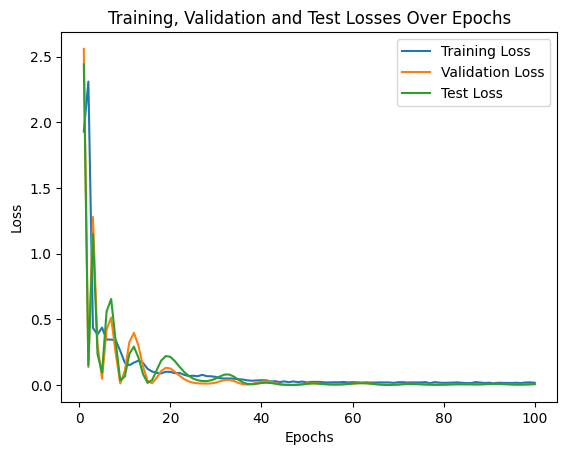

Final Test Loss: 0.0067

Validation Set Metrics:
Mean Absolute Error (MAE): 0.0827
Mean Squared Error (MSE): 0.0077
Root Mean Squared Error (RMSE): 0.0879
Mean Absolute Percentage Error (MAPE): 8.7343

Test Set Metrics:
Mean Absolute Error (MAE): 0.0772
Mean Squared Error (MSE): 0.0067
Root Mean Squared Error (RMSE): 0.0821
Mean Absolute Percentage Error (MAPE): 7.5154


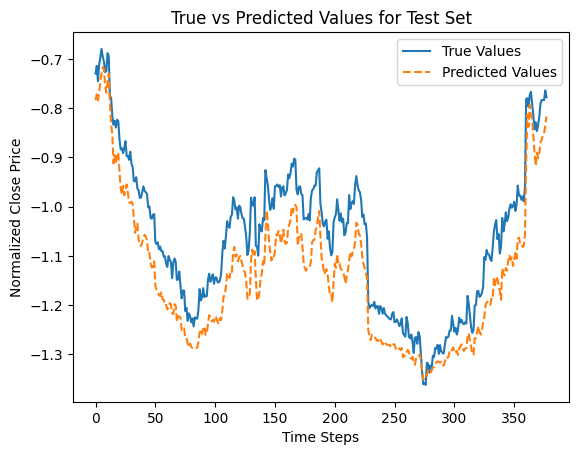

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import yfinance as yf
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# 計算 MAPE 指標的函數
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# 定義股票代碼及日期區間
stock_symbol = "AAL"
start_date = "2015-01-01"
end_date = "2025-01-01"

# 從 Yahoo Finance 下載歷史資料
stock_data = yf.download(stock_symbol, start=start_date, end=end_date, auto_adjust=False)

# 重設索引，讓 'Date' 成為欄位
stock_data.reset_index(inplace=True)

# 將 'Adj Close' 改名為 'Adjusted Close'
stock_data.rename(columns={'Adj Close': 'Adjusted Close'}, inplace=True)

# 使用 'Date' 作為索引
stock_data.set_index('Date', inplace=True)

# 對部分欄位進行正規化
columns_to_normalize = ['Low', 'Open', 'Volume', 'High', 'Close', 'Adjusted Close']
data_to_normalize = stock_data[columns_to_normalize].values

# 轉換成 PyTorch tensor
tensor_data = torch.tensor(data_to_normalize, dtype=torch.float32)

# 計算各欄位的平均與標準差
mean = tensor_data.mean(dim=0)
std = tensor_data.std(dim=0)

# 正規化資料
normalized_data = (tensor_data - mean) / std

# 轉回 DataFrame
df_normalized = pd.DataFrame(normalized_data.numpy(), columns=columns_to_normalize)

# 加回 'Date' 欄位
df_normalized['Date'] = stock_data.index
data = df_normalized

# 設定訓練、驗證與測試資料比例
train_percent = 0.7
val_percent = 0.15
test_percent = 0.15

# 計算各資料集大小
train_size = int(train_percent * len(data))
val_size = int(val_percent * len(data))
test_size = len(data) - train_size - val_size

# 切分資料集
train_data = data.iloc[:train_size]
val_data = data.iloc[train_size:train_size + val_size]
test_data = data.iloc[train_size + val_size:]

# 定義使用的特徵與目標欄位
# 這裡取 'Low', 'Open', 'High' 為特徵（視為圖中三個節點），目標為 'Close'
feature_columns = ['Low', 'Open', 'High']
target_column = 'Close'

# 提取各資料集的特徵與目標
train_features = train_data[feature_columns].values   # shape: (N_train, 3)
train_target = train_data[target_column].values         # shape: (N_train, )

val_features = val_data[feature_columns].values
val_target = val_data[target_column].values

test_features = test_data[feature_columns].values
test_target = test_data[target_column].values

# 轉換為 PyTorch tensor
train_features = torch.tensor(train_features, dtype=torch.float32)
train_target = torch.tensor(train_target, dtype=torch.float32)
val_features = torch.tensor(val_features, dtype=torch.float32)
val_target = torch.tensor(val_target, dtype=torch.float32)
test_features = torch.tensor(test_features, dtype=torch.float32)
test_target = torch.tensor(test_target, dtype=torch.float32)

###############################################
# 定義簡單的 GAT 層 (僅實現單頭注意力)
###############################################
class SimpleGATLayer(nn.Module):
    def __init__(self, in_features, out_features, dropout=0.6, alpha=0.2, concat=True):
        """
        in_features  : 輸入特徵維度
        out_features : 輸出特徵維度
        dropout      : dropout 比例
        alpha        : LeakyReLU 的負斜率
        concat       : 若為 True，則輸出經過非線性激活
        """
        super(SimpleGATLayer, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.dropout = dropout
        self.alpha = alpha
        self.concat = concat

        self.W = nn.Linear(in_features, out_features, bias=False)
        # 注意力權重參數 a，其形狀為 (2*out_features, 1)
        self.a = nn.Parameter(torch.empty(size=(2 * out_features, 1)))
        nn.init.xavier_uniform_(self.W.weight.data, gain=1.414)
        nn.init.xavier_uniform_(self.a.data, gain=1.414)
        self.leakyrelu = nn.LeakyReLU(self.alpha)

    def forward(self, h):
        """
        h: 輸入 tensor，形狀 (batch_size, num_nodes, in_features)
        """
        batch_size, num_nodes, _ = h.size()
        Wh = self.W(h)  # (batch_size, num_nodes, out_features)
        # 為每個圖中所有節點配對：分別展開成 (batch, num_nodes, num_nodes, out_features)
        Wh_i = Wh.unsqueeze(2).repeat(1, 1, num_nodes, 1)
        Wh_j = Wh.unsqueeze(1).repeat(1, num_nodes, 1, 1)
        # 將節點 i 與 j 的表示連接起來：形狀 (batch, num_nodes, num_nodes, 2*out_features)
        cat = torch.cat([Wh_i, Wh_j], dim=3)
        # 計算注意力係數 e_{ij}，並 squeeze 掉最後一維：形狀 (batch, num_nodes, num_nodes)
        e = self.leakyrelu(torch.matmul(cat, self.a).squeeze(3))
        # 對每個節點 i，對所有 j 做 softmax（沿著節點維度）
        attention = torch.softmax(e, dim=2)
        attention = torch.dropout(attention, p=self.dropout, train=self.training)
        # 計算加權求和：每個節點 i 的新表示為 sum_j (alpha_{ij} * Wh_j)
        h_prime = torch.matmul(attention, Wh)  # (batch, num_nodes, out_features)
        if self.concat:
            return torch.relu(h_prime)
        else:
            return h_prime

###############################################
# 定義 GAT + Transformer 模型
###############################################
class GATTransformerModel(nn.Module):
    def __init__(self, num_nodes, node_in_features, hidden_size, output_size, num_layers, num_attention_heads,
                 gat_dropout=0.6, gat_alpha=0.2):
        """
        num_nodes         : 節點數（即特徵數，這裡為 3）
        node_in_features  : 每個節點原始特徵維度（這裡為 1，因為每個特徵為一個數值）
        hidden_size       : 隱藏層維度
        output_size       : 輸出維度（預測目標為一個數值）
        num_layers        : Transformer 的層數
        num_attention_heads: Transformer 的多頭注意力數量
        """
        super(GATTransformerModel, self).__init__()
        # 將每個原始節點特徵（1 維）映射到 hidden_size
        self.node_embedding = nn.Linear(node_in_features, hidden_size)
        # GAT 層：這裡使用自訂的單頭 GAT 層
        self.gat = SimpleGATLayer(hidden_size, hidden_size, dropout=gat_dropout, alpha=gat_alpha, concat=True)
        # Transformer 層：注意 nn.Transformer 要求輸入形狀為 (seq_len, batch, hidden_size)
        self.transformer = nn.Transformer(
            d_model=hidden_size,
            nhead=num_attention_heads,
            num_encoder_layers=num_layers,
            num_decoder_layers=num_layers
        )
        # 最後全連接層將 Transformer 的輸出轉換到預測維度
        self.fc_output = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        """
        x: 輸入 tensor，形狀 (batch_size, num_nodes)
           注意：每一行包含 3 個特徵值，分別代表圖中的 3 個節點。
        """
        # 將每個節點的標量特徵轉換為形狀 (batch, num_nodes, 1)
        x = x.unsqueeze(-1)
        # 節點嵌入
        x = self.node_embedding(x)  # (batch, num_nodes, hidden_size)
        # 經過 GAT 層，整合各節點間關係
        x = self.gat(x)             # (batch, num_nodes, hidden_size)
        # Transformer 要求輸入形狀 (seq_len, batch, hidden_size)
        x = x.permute(1, 0, 2)      # seq_len = num_nodes (即 3)
        # 使用相同資料作為 source 與 target
        x = self.transformer(x, x)
        # 將輸出轉回 (batch, seq_len, hidden_size)
        x = x.permute(1, 0, 2)
        # 取序列中最後一個節點的輸出做預測
        x = self.fc_output(x[:, -1, :])  # (batch, output_size)
        return x

###############################################
# 設定模型超參數與建立模型
###############################################
# 此處 num_nodes = 3（對應 Low, Open, High），node_in_features = 1
num_nodes = len(feature_columns)  # 3
node_in_features = 1
hidden_size = 64
output_size = 1
num_layers = 2
num_attention_heads = 4
learning_rate = 0.001
num_epochs = 100

# 建立模型實例
model = GATTransformerModel(num_nodes, node_in_features, hidden_size, output_size,
                            num_layers, num_attention_heads)

# 定義損失函數與優化器（這裡使用均方誤差損失）
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# 用於記錄訓練、驗證與測試損失的 list
train_losses = []
val_losses = []
test_losses = []

###############################################
# 訓練迴圈
###############################################
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    # 前向傳播：注意此處直接輸入 train_features，形狀為 (batch, 3)
    outputs = model(train_features)
    loss = criterion(outputs, train_target.unsqueeze(1))
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())
    print(f'Epoch [{epoch + 1}/{num_epochs}], Training Loss: {loss.item():.4f}')

    # 驗證
    model.eval()
    with torch.no_grad():
        val_outputs = model(val_features)
        val_loss = criterion(val_outputs, val_target.unsqueeze(1))
    val_losses.append(val_loss.item())
    print(f'Epoch [{epoch + 1}/{num_epochs}], Validation Loss: {val_loss.item():.4f}')

    # 測試
    with torch.no_grad():
        test_outputs = model(test_features)
        test_loss = criterion(test_outputs, test_target.unsqueeze(1))
    test_losses.append(test_loss.item())
    print(f'Epoch [{epoch + 1}/{num_epochs}], Test Loss: {test_loss.item():.4f}')

# 繪製訓練、驗證與測試損失曲線
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training, Validation and Test Losses Over Epochs')
plt.legend()
plt.show()

print(f'Final Test Loss: {test_losses[-1]:.4f}\n')

###############################################
# 驗證與測試結果評估
###############################################
model.eval()

# 驗證集預測與評估
with torch.no_grad():
    val_predictions = model(val_features)
val_predictions = val_predictions.squeeze(1).numpy()
val_target_numpy = val_target.numpy()

mae_val = mean_absolute_error(val_target_numpy, val_predictions)
mse_val = mean_squared_error(val_target_numpy, val_predictions)
rmse_val = np.sqrt(mse_val)
mape_val = calculate_mape(val_target_numpy, val_predictions)

print('Validation Set Metrics:')
print(f'Mean Absolute Error (MAE): {mae_val:.4f}')
print(f'Mean Squared Error (MSE): {mse_val:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_val:.4f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_val:.4f}\n')

# 測試集預測與評估
with torch.no_grad():
    test_predictions = model(test_features)
test_predictions = test_predictions.squeeze(1).numpy()
test_target_numpy = test_target.numpy()

mae_test = mean_absolute_error(test_target_numpy, test_predictions)
mse_test = mean_squared_error(test_target_numpy, test_predictions)
rmse_test = np.sqrt(mse_test)
mape_test = calculate_mape(test_target_numpy, test_predictions)

print('Test Set Metrics:')
print(f'Mean Absolute Error (MAE): {mae_test:.4f}')
print(f'Mean Squared Error (MSE): {mse_test:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_test:.4f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_test:.4f}')

# 繪製測試集真實值與預測值對比圖
plt.plot(test_target_numpy, label='True Values')
plt.plot(test_predictions, label='Predicted Values', linestyle='dashed')
plt.xlabel('Time Steps')
plt.ylabel('Normalized Close Price')
plt.title('True vs Predicted Values for Test Set')
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed


Epoch [1/100], Training Loss: 1.3664
Epoch [1/100], Validation Loss: 2.2945
Epoch [1/100], Test Loss: 2.8307
Epoch [2/100], Training Loss: 1.1573
Epoch [2/100], Validation Loss: 2.0381
Epoch [2/100], Test Loss: 2.5189
Epoch [3/100], Training Loss: 0.9957
Epoch [3/100], Validation Loss: 1.8026
Epoch [3/100], Test Loss: 2.2294
Epoch [4/100], Training Loss: 0.8296
Epoch [4/100], Validation Loss: 1.5822
Epoch [4/100], Test Loss: 1.9612
Epoch [5/100], Training Loss: 0.7105
Epoch [5/100], Validation Loss: 1.3723
Epoch [5/100], Test Loss: 1.7054
Epoch [6/100], Training Loss: 0.5926
Epoch [6/100], Validation Loss: 1.1750
Epoch [6/100], Test Loss: 1.4652
Epoch [7/100], Training Loss: 0.5073
Epoch [7/100], Validation Loss: 0.9900
Epoch [7/100], Test Loss: 1.2409
Epoch [8/100], Training Loss: 0.4147
Epoch [8/100], Validation Loss: 0.8202
Epoch [8/100], Test Loss: 1.0382
Epoch [9/100], Training Loss: 0.3554
Epoch [9/100], Validation Loss: 0.6773
Epoch [9/100], Test Loss: 0.8662
Epoch [10/100], Tra

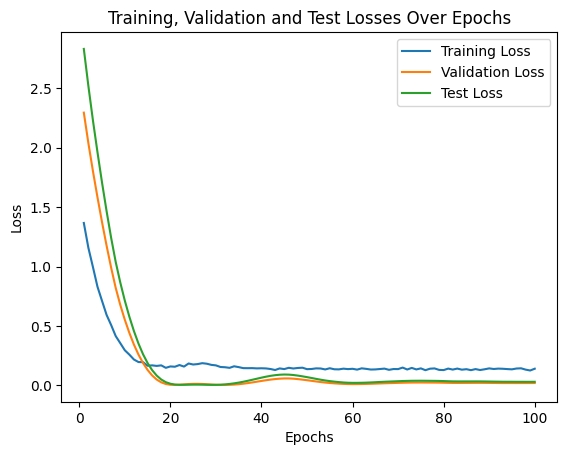

Final Test Loss: 0.0301

Validation Set Metrics:
Mean Absolute Error (MAE): 0.1359
Mean Squared Error (MSE): 0.0198
Root Mean Squared Error (RMSE): 0.1405
Mean Absolute Percentage Error (MAPE): 14.3461

Test Set Metrics:
Mean Absolute Error (MAE): 0.1686
Mean Squared Error (MSE): 0.0301
Root Mean Squared Error (RMSE): 0.1735
Mean Absolute Percentage Error (MAPE): 15.6345


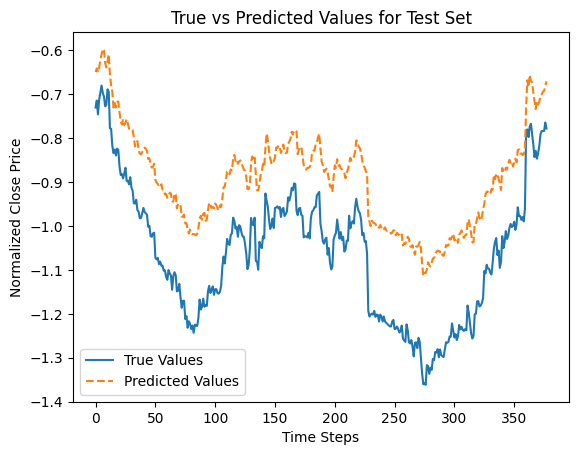

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import yfinance as yf
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# 計算 Mean Absolute Percentage Error (MAPE) 的函數
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

###############################################
# 資料讀取與前處理
###############################################
# 定義股票代碼與日期區間
stock_symbol = "AAL"
start_date = "2015-01-01"
end_date = "2025-01-01"

# 從 Yahoo Finance 下載歷史資料
stock_data = yf.download(stock_symbol, start=start_date, end=end_date, auto_adjust=False)

# 重設索引，讓 'Date' 成為欄位
stock_data.reset_index(inplace=True)

# 將 'Adj Close' 改名為 'Adjusted Close'
stock_data.rename(columns={'Adj Close': 'Adjusted Close'}, inplace=True)

# 將 'Date' 設為索引
stock_data.set_index('Date', inplace=True)

# 需要正規化的欄位
columns_to_normalize = ['Low', 'Open', 'Volume', 'High', 'Close', 'Adjusted Close']
data_to_normalize = stock_data[columns_to_normalize].values

# 轉換為 PyTorch tensor
tensor_data = torch.tensor(data_to_normalize, dtype=torch.float32)

# 計算均值與標準差
mean = tensor_data.mean(dim=0)
std = tensor_data.std(dim=0)

# 正規化資料
normalized_data = (tensor_data - mean) / std

# 轉換回 DataFrame
df_normalized = pd.DataFrame(normalized_data.numpy(), columns=columns_to_normalize)
df_normalized['Date'] = stock_data.index
data = df_normalized

# 切分資料集 (訓練70%，驗證15%，測試15%)
train_percent = 0.7
val_percent = 0.15
test_percent = 0.15

train_size = int(train_percent * len(data))
val_size = int(val_percent * len(data))
test_size = len(data) - train_size - val_size

train_data = data.iloc[:train_size]
val_data = data.iloc[train_size:train_size + val_size]
test_data = data.iloc[train_size + val_size:]

# 定義特徵與目標欄位
# 此處取 'Low', 'Open', 'High' 為特徵（視為圖中的三個節點），預測 'Close'
feature_columns = ['Low', 'Open', 'High']
target_column = 'Close'

train_features = train_data[feature_columns].values   # (N_train, 3)
train_target = train_data[target_column].values         # (N_train, )

val_features = val_data[feature_columns].values
val_target = val_data[target_column].values

test_features = test_data[feature_columns].values
test_target = test_data[target_column].values

# 轉換為 PyTorch tensors
train_features = torch.tensor(train_features, dtype=torch.float32)
train_target = torch.tensor(train_target, dtype=torch.float32)
val_features = torch.tensor(val_features, dtype=torch.float32)
val_target = torch.tensor(val_target, dtype=torch.float32)
test_features = torch.tensor(test_features, dtype=torch.float32)
test_target = torch.tensor(test_target, dtype=torch.float32)

###############################################
# 定義簡易 GAT 層 (單頭注意力)
###############################################
class SimpleGATLayer(nn.Module):
    def __init__(self, in_features, out_features, dropout=0.6, alpha=0.2, concat=True):
        """
        in_features  : 輸入特徵維度
        out_features : 輸出特徵維度
        dropout      : dropout 比例
        alpha        : LeakyReLU 的負斜率
        concat       : 若為 True，則輸出經過 ReLU 激活
        """
        super(SimpleGATLayer, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.dropout = dropout
        self.alpha = alpha
        self.concat = concat

        self.W = nn.Linear(in_features, out_features, bias=False)
        # 注意力權重參數 a，其形狀為 (2*out_features, 1)
        self.a = nn.Parameter(torch.empty(size=(2 * out_features, 1)))
        nn.init.xavier_uniform_(self.W.weight.data, gain=1.414)
        nn.init.xavier_uniform_(self.a.data, gain=1.414)
        self.leakyrelu = nn.LeakyReLU(self.alpha)

    def forward(self, h):
        """
        h: 輸入 tensor，形狀 (batch_size, num_nodes, in_features)
        """
        batch_size, num_nodes, _ = h.size()
        Wh = self.W(h)  # (batch, num_nodes, out_features)
        # 為每個節點配對，獲得 i 與 j 的表示
        Wh_i = Wh.unsqueeze(2).repeat(1, 1, num_nodes, 1)
        Wh_j = Wh.unsqueeze(1).repeat(1, num_nodes, 1, 1)
        # 連接後的形狀為 (batch, num_nodes, num_nodes, 2*out_features)
        cat = torch.cat([Wh_i, Wh_j], dim=3)
        # 計算注意力係數 e_{ij}，形狀 (batch, num_nodes, num_nodes)
        e = self.leakyrelu(torch.matmul(cat, self.a).squeeze(3))
        # 針對每個節點 i 進行 softmax
        attention = torch.softmax(e, dim=2)
        attention = torch.dropout(attention, p=self.dropout, train=self.training)
        # 計算每個節點的新表示
        h_prime = torch.matmul(attention, Wh)  # (batch, num_nodes, out_features)
        if self.concat:
            return torch.relu(h_prime)
        else:
            return h_prime

###############################################
# 定義只使用 GAT 模型
###############################################
class GATModel(nn.Module):
    def __init__(self, num_nodes, node_in_features, hidden_size, output_size, dropout=0.6, alpha=0.2):
        """
        num_nodes        : 節點數（本例中為 3）
        node_in_features : 每個節點原始特徵維度（本例為 1）
        hidden_size      : 隱藏層維度
        output_size      : 輸出維度（預測單一數值）
        """
        super(GATModel, self).__init__()
        # 將每個原始標量特徵嵌入到 hidden_size 維度
        self.node_embedding = nn.Linear(node_in_features, hidden_size)
        # GAT 層整合節點間資訊
        self.gat = SimpleGATLayer(hidden_size, hidden_size, dropout=dropout, alpha=alpha, concat=True)
        # 全連接層將聚合後的資訊映射到預測值
        self.fc_output = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        """
        x: 輸入 tensor，形狀 (batch_size, num_nodes)
           每一筆資料有 3 個標量特徵
        """
        # 將每個標量特徵擴展成 (batch, num_nodes, 1)
        x = x.unsqueeze(-1)
        # 節點嵌入
        x = self.node_embedding(x)  # (batch, num_nodes, hidden_size)
        # 經過 GAT 層
        x = self.gat(x)             # (batch, num_nodes, hidden_size)
        # 對所有節點做平均聚合
        x = torch.mean(x, dim=1)    # (batch, hidden_size)
        # 輸出預測結果
        x = self.fc_output(x)       # (batch, output_size)
        return x

###############################################
# 設定超參數與建立模型
###############################################
num_nodes = len(feature_columns)  # 3
node_in_features = 1              # 每個節點原始特徵為一個標量
hidden_size = 64
output_size = 1
learning_rate = 0.001
num_epochs = 100

# 建立模型實例
model = GATModel(num_nodes, node_in_features, hidden_size, output_size)

# 定義損失函數與優化器
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# 用於記錄訓練、驗證與測試損失
train_losses = []
val_losses = []
test_losses = []

###############################################
# 訓練迴圈
###############################################
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    
    # 前向傳播：輸入 shape 為 (batch, 3)
    outputs = model(train_features)
    loss = criterion(outputs, train_target.unsqueeze(1))
    loss.backward()
    optimizer.step()
    
    train_losses.append(loss.item())
    print(f'Epoch [{epoch + 1}/{num_epochs}], Training Loss: {loss.item():.4f}')
    
    # 驗證階段
    model.eval()
    with torch.no_grad():
        val_outputs = model(val_features)
        val_loss = criterion(val_outputs, val_target.unsqueeze(1))
    val_losses.append(val_loss.item())
    print(f'Epoch [{epoch + 1}/{num_epochs}], Validation Loss: {val_loss.item():.4f}')
    
    # 測試階段
    with torch.no_grad():
        test_outputs = model(test_features)
        test_loss = criterion(test_outputs, test_target.unsqueeze(1))
    test_losses.append(test_loss.item())
    print(f'Epoch [{epoch + 1}/{num_epochs}], Test Loss: {test_loss.item():.4f}')

# 繪製訓練、驗證與測試損失曲線
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training, Validation and Test Losses Over Epochs')
plt.legend()
plt.show()

print(f'Final Test Loss: {test_losses[-1]:.4f}\n')

###############################################
# 評估模型表現：驗證集與測試集
###############################################
model.eval()

# 驗證集評估
with torch.no_grad():
    val_predictions = model(val_features)
val_predictions = val_predictions.squeeze(1).numpy()
val_target_numpy = val_target.numpy()

mae_val = mean_absolute_error(val_target_numpy, val_predictions)
mse_val = mean_squared_error(val_target_numpy, val_predictions)
rmse_val = np.sqrt(mse_val)
mape_val = calculate_mape(val_target_numpy, val_predictions)

print('Validation Set Metrics:')
print(f'Mean Absolute Error (MAE): {mae_val:.4f}')
print(f'Mean Squared Error (MSE): {mse_val:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_val:.4f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_val:.4f}\n')

# 測試集評估
with torch.no_grad():
    test_predictions = model(test_features)
test_predictions = test_predictions.squeeze(1).numpy()
test_target_numpy = test_target.numpy()

mae_test = mean_absolute_error(test_target_numpy, test_predictions)
mse_test = mean_squared_error(test_target_numpy, test_predictions)
rmse_test = np.sqrt(mse_test)
mape_test = calculate_mape(test_target_numpy, test_predictions)

print('Test Set Metrics:')
print(f'Mean Absolute Error (MAE): {mae_test:.4f}')
print(f'Mean Squared Error (MSE): {mse_test:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_test:.4f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_test:.4f}')

# 繪製測試集真實值與預測值對比圖
plt.plot(test_target_numpy, label='True Values')
plt.plot(test_predictions, label='Predicted Values', linestyle='dashed')
plt.xlabel('Time Steps')
plt.ylabel('Normalized Close Price')
plt.title('True vs Predicted Values for Test Set')
plt.legend()
plt.show()
